# Importing important liberaries:


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Sentiment.csv')
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [3]:
data.shape

(13871, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

# Keeping only the necessary columns

In [5]:
data [['text','sentiment']]

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


### 1.First of all, splitting the data set into a training and a testing set. The test set is the 10% of the original data set.

### 2.For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [6]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

In [7]:
# Splitting the dataset into train and test set
train,test = train_test_split(data,test_size = 0.1)

In [8]:
train

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
2853,2854,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,377,NaN,NaN,RT @FrankTheDoorman: The winner of the #GOPDeb...,NaN,2015-08-07 09:25:58 -0700,629689952142495745,East Cost,NaN
9534,9535,Donald Trump,1.0000,yes,1.0000,Negative,0.7000,None of the above,1.0000,NaN,...,NaN,7,NaN,NaN,RT @monaeltahawy: Paging the Donald: you can't...,NaN,2015-08-06 20:21:22 -0700,629492502353940480,TX,Central Time (US & Canada)
6027,6028,John Kasich,0.6484,yes,1.0000,Positive,0.3516,LGBT issues,1.0000,NaN,...,NaN,0,NaN,NaN,"@JohnKasich be like: ""If you turn out to be ga...",NaN,2015-08-07 08:26:42 -0700,629675039261097984,New York - Madrid - Berlin,Eastern Time (US & Canada)
8034,8035,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,FOX News or Moderators,0.6425,NaN,...,NaN,6,NaN,NaN,RT @KLSouth: .@marthamaccallum &amp; @BillHemm...,NaN,2015-08-07 07:28:14 -0700,629660326259240960,America,NaN
2708,2709,John Kasich,1.0000,yes,1.0000,Positive,0.6667,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,@JohnKasich ate @JebBush's lunch last nite. Yo...,NaN,2015-08-07 09:27:47 -0700,629690409506185216,"Fayetteville, NC",Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4350,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,0.7100,NaN,...,NaN,0,NaN,NaN,lungtawellness: KatyTurNBC biggest loser in la...,NaN,2015-08-07 09:08:06 -0700,629685456603586560,USA,Hawaii
1539,1540,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,Religion,0.6629,NaN,...,NaN,178,NaN,NaN,"RT @P0TUS: Oh, this'll be good. Watch ten grow...",NaN,2015-08-07 09:40:15 -0700,629693549416718336,Amsterdam,NaN
6690,6691,Ted Cruz,1.0000,yes,1.0000,Positive,0.6897,None of the above,1.0000,NaN,...,NaN,1,NaN,NaN,Is it jut me or is @tedcruz playing 3D chess i...,NaN,2015-08-07 08:16:38 -0700,629672504445898752,Central massachusetts,Eastern Time (US & Canada)
9628,9629,No candidate mentioned,0.3941,yes,0.6277,Positive,0.3321,None of the above,0.3941,NaN,...,NaN,0,NaN,NaN,It's a beautiful night in #Hollywood! If you'v...,NaN,2015-08-06 20:17:35 -0700,629491549961854976,"Hollywood, CA",Pacific Time (US & Canada)


In [9]:
test

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
9004,9005,Ben Carson,1.0000,yes,1.0000,Positive,0.6382,None of the above,1.0000,NaN,...,NaN,8,NaN,NaN,RT @KentPavelka: Three best performance in the...,NaN,2015-08-06 21:14:14 -0700,629505806682165248,Iowa's Leading Edge™,Central Time (US & Canada)
10488,10489,Donald Trump,1.0000,yes,1.0000,Negative,0.6984,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,I DONT BELIEVE HIM AND THIS IS WHY ALL FACTS D...,NaN,2015-08-06 19:54:20 -0700,629485700195446784,Atlanta,Eastern Time (US & Canada)
437,438,Jeb Bush,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,"Favorite Jeb line ""taking on the teacher's uni...",NaN,2015-08-07 09:51:27 -0700,629696367133265920,"Lawton, Oklahoma",NaN
8915,8916,Donald Trump,1.0000,yes,1.0000,Positive,0.6526,Immigration,0.6526,NaN,...,NaN,105,NaN,NaN,"RT @RWSurferGirl: Trump has got it right, nobo...",NaN,2015-08-06 21:30:24 -0700,629509874775228416,USA,Central Time (US & Canada)
4092,4093,Scott Walker,0.3888,yes,0.6235,Negative,0.6235,None of the above,0.3888,NaN,...,NaN,0,NaN,NaN,TruthTeamOne: The big winner of the #GOPDebate...,NaN,2015-08-07 09:11:09 -0700,629686225901867008,USA,Hawaii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2682,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,467,NaN,NaN,RT @greysonchance: Watching the #GOPDebate wit...,NaN,2015-08-07 09:28:03 -0700,629690476585594880,PLANET X WITH GREXy,NaN
3556,3557,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,The #GOPDebate was akin to watching institutio...,NaN,2015-08-07 09:17:26 -0700,629687807460552704,Elysium,NaN
4601,4602,No candidate mentioned,0.3765,yes,0.6136,Neutral,0.6136,None of the above,0.3765,NaN,...,NaN,4,NaN,NaN,RT @gregpinelo: WE MUST DEFEAT SOCIAL SECURITY...,NaN,2015-08-07 08:47:36 -0700,629680299274825728,Georgia USA,Eastern Time (US & Canada)
273,274,Donald Trump,0.4036,yes,0.6353,Negative,0.6353,NaN,0.2317,NaN,...,NaN,2,NaN,NaN,RT @lesleyabravanel: Trump sycophants want to ...,NaN,2015-08-07 09:52:43 -0700,629696684596035584,Toronto - Cartagena,Atlantic Time (Canada)


In [10]:
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [11]:
train

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
2853,2854,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,377,NaN,NaN,RT @FrankTheDoorman: The winner of the #GOPDeb...,NaN,2015-08-07 09:25:58 -0700,629689952142495745,East Cost,NaN
9534,9535,Donald Trump,1.0000,yes,1.0000,Negative,0.7000,None of the above,1.0000,NaN,...,NaN,7,NaN,NaN,RT @monaeltahawy: Paging the Donald: you can't...,NaN,2015-08-06 20:21:22 -0700,629492502353940480,TX,Central Time (US & Canada)
6027,6028,John Kasich,0.6484,yes,1.0000,Positive,0.3516,LGBT issues,1.0000,NaN,...,NaN,0,NaN,NaN,"@JohnKasich be like: ""If you turn out to be ga...",NaN,2015-08-07 08:26:42 -0700,629675039261097984,New York - Madrid - Berlin,Eastern Time (US & Canada)
8034,8035,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,FOX News or Moderators,0.6425,NaN,...,NaN,6,NaN,NaN,RT @KLSouth: .@marthamaccallum &amp; @BillHemm...,NaN,2015-08-07 07:28:14 -0700,629660326259240960,America,NaN
2708,2709,John Kasich,1.0000,yes,1.0000,Positive,0.6667,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,@JohnKasich ate @JebBush's lunch last nite. Yo...,NaN,2015-08-07 09:27:47 -0700,629690409506185216,"Fayetteville, NC",Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4350,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,0.7100,NaN,...,NaN,0,NaN,NaN,lungtawellness: KatyTurNBC biggest loser in la...,NaN,2015-08-07 09:08:06 -0700,629685456603586560,USA,Hawaii
1539,1540,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,Religion,0.6629,NaN,...,NaN,178,NaN,NaN,"RT @P0TUS: Oh, this'll be good. Watch ten grow...",NaN,2015-08-07 09:40:15 -0700,629693549416718336,Amsterdam,NaN
6690,6691,Ted Cruz,1.0000,yes,1.0000,Positive,0.6897,None of the above,1.0000,NaN,...,NaN,1,NaN,NaN,Is it jut me or is @tedcruz playing 3D chess i...,NaN,2015-08-07 08:16:38 -0700,629672504445898752,Central massachusetts,Eastern Time (US & Canada)
9628,9629,No candidate mentioned,0.3941,yes,0.6277,Positive,0.3321,None of the above,0.3941,NaN,...,NaN,0,NaN,NaN,It's a beautiful night in #Hollywood! If you'v...,NaN,2015-08-06 20:17:35 -0700,629491549961854976,"Hollywood, CA",Pacific Time (US & Canada)


### As a next step I separated the Positive and Negative tweets of the training setin order to easily visualize their contained words.

### After that I cleaned the text from hashtags, mentions and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [12]:
!pip install wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

Positive words


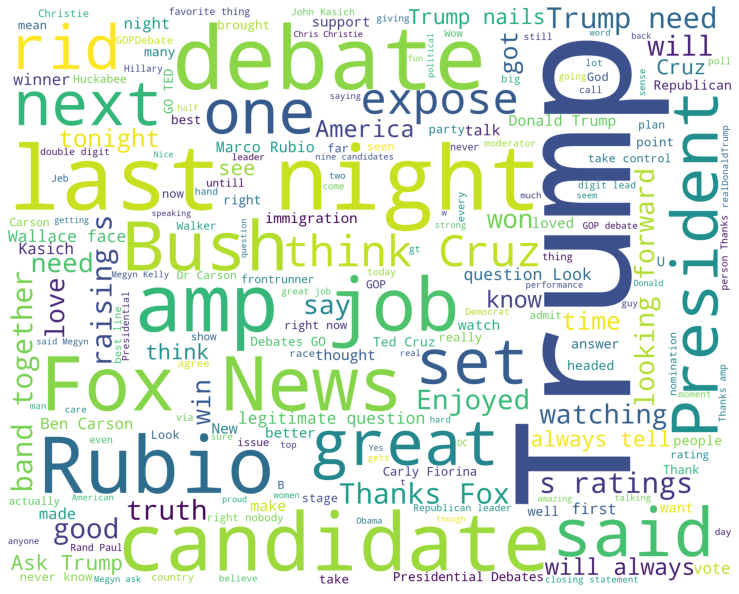

Negative words


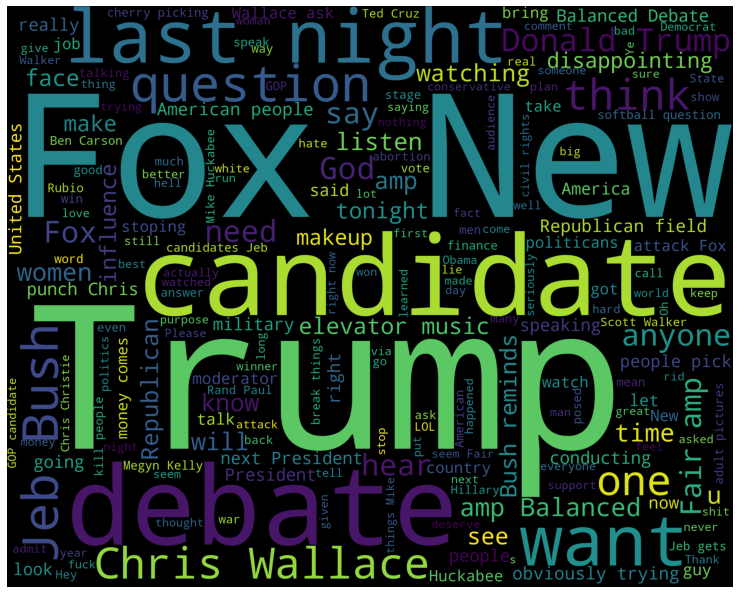

In [13]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

1.interesting to notice the following words and expressions in the positive word set: truth, strong, legitimate, together, love, job

2.In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.

3.At the same time, negative tweets contains words like: influence, news, elevatormusic, disappointing, softball, makeup, cherry picking, trying

4.In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

5.After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

6.Stop Word: Stop Words are words which do not contain important significance to be used in Search Queries.

7.Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [14]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

### As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [15]:
#Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

### Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

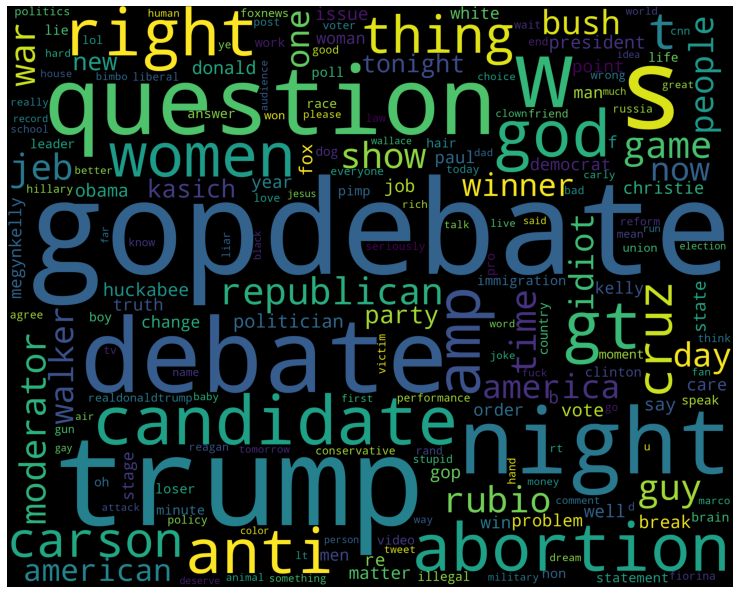

In [16]:
wordcloud_draw(w_features)

## Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [17]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

### Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.


In [18]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 888/851 
[Positive]: 199/80 
